# Capstone Project Part II:
### By Bailey Duncan

The full report and problem summary can be found [here](./Capstone%20Report.md).

In [2]:
!pip install --upgrade pandas 
import pandas as pd
import numpy as np

# Machine Learning & Data Science Helper Library
import sklearn

# Map rendering library
import folium

# Feature Scaling
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

Requirement already up-to-date: pandas in c:\users\baileyduncan\anaconda3\lib\site-packages (0.24.2)


In [3]:
apt_rentals = pd.read_csv("apt_rentals_X_neighborhood.csv")

In [4]:
apt_rentals.drop(['Unnamed: 0', 'Address', 'Neighborhood'], axis=1, inplace=True)
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Postal Code,Borough
0,1,1.0,1,43.643051,-79.391643,2150.0,M5V,Downtown Toronto
1,1,1.0,0,43.640918,-79.393982,1900.0,M5V,Downtown Toronto
2,1,1.0,0,43.641308,-79.400093,1900.0,M5V,Downtown Toronto
3,1,1.0,1,43.640068,-79.399960,2400.0,M5V,Downtown Toronto
4,1,1.0,0,43.647627,-79.390408,2650.0,M5V,Downtown Toronto


## Add another feature: Distance from Downtown (Lets say from City Hall)
### Toronto City Hall (Latitude: 43.653908, Longitude: -79.384293)

In [5]:
downtown_lat = 43.653908
downtown_long = -79.384293

In [6]:
# compute euclidean distance
apt_rentals['Downtown Proximity'] = np.linalg.norm(apt_rentals[['Lat', 'Long']].sub(np.array([downtown_lat, downtown_long])), axis=1)

In [7]:
# Scale our distance measure from 0-1
min_max_scaler = MinMaxScaler()
proximity = apt_rentals[['Downtown Proximity']]
proximity_scaled = min_max_scaler.fit_transform(proximity)

apt_rentals['Downtown Proximity'] = proximity_scaled

In [8]:
apt_rentals.plot.scatter(x='Lat', y='Long')

In [9]:
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Postal Code,Borough,Downtown Proximity
0,1,1.0,1,43.643051,-79.391643,2150.0,M5V,Downtown Toronto,0.106921
1,1,1.0,0,43.640918,-79.393982,1900.0,M5V,Downtown Toronto,0.134128
2,1,1.0,0,43.641308,-79.400093,1900.0,M5V,Downtown Toronto,0.169330
3,1,1.0,1,43.640068,-79.399960,2400.0,M5V,Downtown Toronto,0.175443
4,1,1.0,0,43.647627,-79.390408,2650.0,M5V,Downtown Toronto,0.068714


In [10]:
apt_rentals.corr()

,Bedroom,Bathroom,Den,Lat,Long,Price,Downtown Proximity
Bedroom,1.000000,0.746418,-0.247217,-0.064679,-0.080318,0.554753,0.074447
Bathroom,0.746418,1.000000,-0.142905,-0.049076,0.075154,0.576192,-0.048037
Den,-0.247217,-0.142905,1.000000,-0.152485,0.005625,0.055606,-0.008705
Lat,-0.064679,-0.049076,-0.152485,1.000000,0.225499,-0.219085,0.116950
Long,-0.080318,0.075154,0.005625,0.225499,1.000000,0.097965,-0.410571
Price,0.554753,0.576192,0.055606,-0.219085,0.097965,1.000000,-0.181565
Downtown Proximity,0.074447,-0.048037,-0.008705,0.116950,-0.410571,-0.181565,1.000000


In [11]:
apt_rentals['Borough'].value_counts()

Downtown Toronto    654
West Toronto         79
Central Toronto      21
East Toronto         10
Name: Borough, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B31663390>,
      dtype=object)

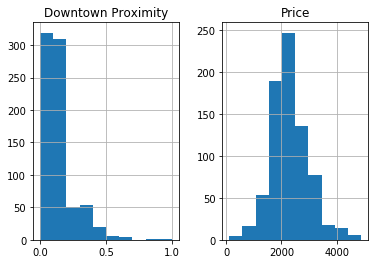

In [12]:
apt_rentals[['Price', 'Downtown Proximity']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B31500A20>,
      dtype=object)

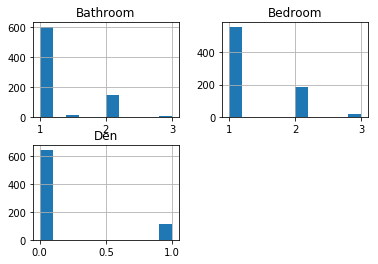

In [13]:
apt_rentals[['Bathroom', 'Den', 'Bedroom']].hist()

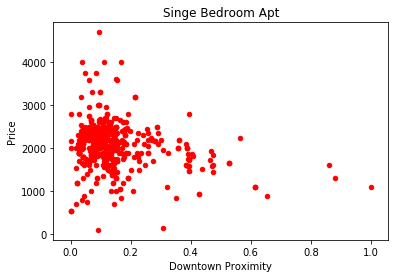

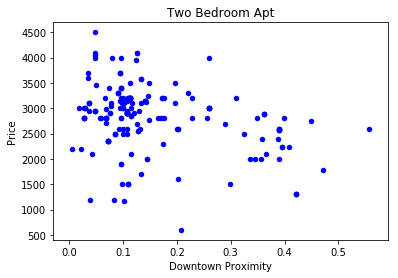

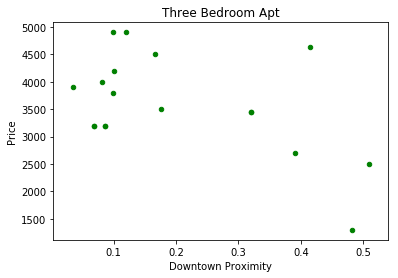

In [14]:
apt_rentals.loc[apt_rentals['Bedroom']==1].plot.scatter(x='Downtown Proximity', y='Price', c='Red', title="Singe Bedroom Apt")
apt_rentals.loc[apt_rentals['Bedroom']==2].plot.scatter(x='Downtown Proximity', y='Price', c="Blue", title='Two Bedroom Apt')
apt_rentals.loc[apt_rentals['Bedroom']==3].plot.scatter(x='Downtown Proximity', y='Price', c="Green", title='Three Bedroom Apt')

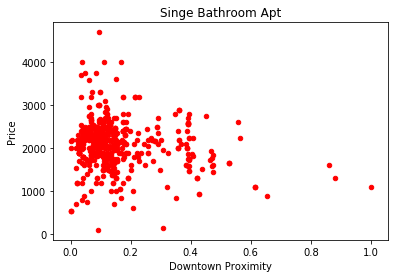

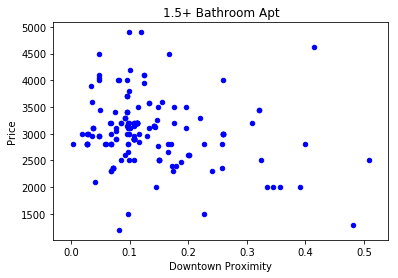

In [15]:
apt_rentals.loc[apt_rentals['Bathroom'] == 1].plot.scatter(x='Downtown Proximity', y='Price', c='Red', title="Singe Bathroom Apt")
apt_rentals.loc[apt_rentals['Bathroom'] > 1].plot.scatter(x='Downtown Proximity', y='Price', c="Blue", title='1.5+ Bathroom Apt')

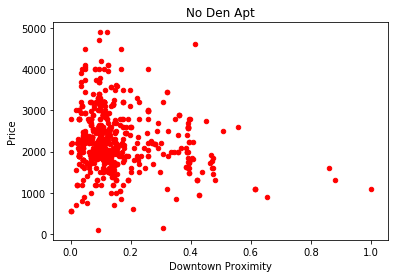

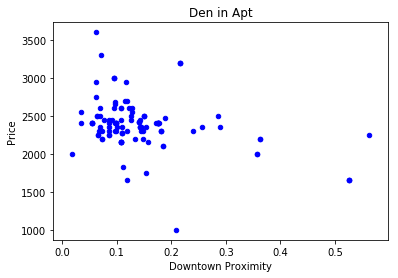

In [16]:
apt_rentals.loc[apt_rentals['Den'] == 0].plot.scatter(x='Downtown Proximity', y='Price', c='Red', title="No Den Apt")
apt_rentals.loc[apt_rentals['Den'] > 0].plot.scatter(x='Downtown Proximity', y='Price', c="Blue", title='Den in Apt')

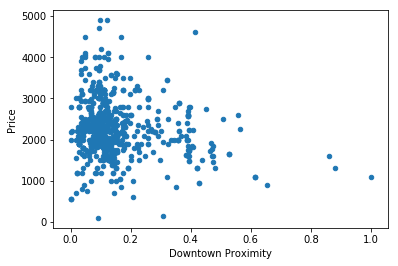

In [17]:
apt_rentals.plot.scatter(x='Downtown Proximity', y='Price')

In [18]:
def color(neighborhood):
    colors = {
        'Downtown Toronto':1,
        'East Toronto':2,
        'West Toronto':3,
        'Central Toronto':4
    }
    
    return colors[neighborhood]

In [19]:
apt_rentals['Borough Color'] = apt_rentals['Borough'].apply(lambda borough: color(borough))
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Postal Code,Borough,Downtown Proximity,Borough Color
0,1,1.0,1,43.643051,-79.391643,2150.0,M5V,Downtown Toronto,0.106921,1
1,1,1.0,0,43.640918,-79.393982,1900.0,M5V,Downtown Toronto,0.134128,1
2,1,1.0,0,43.641308,-79.400093,1900.0,M5V,Downtown Toronto,0.169330,1
3,1,1.0,1,43.640068,-79.399960,2400.0,M5V,Downtown Toronto,0.175443,1
4,1,1.0,0,43.647627,-79.390408,2650.0,M5V,Downtown Toronto,0.068714,1


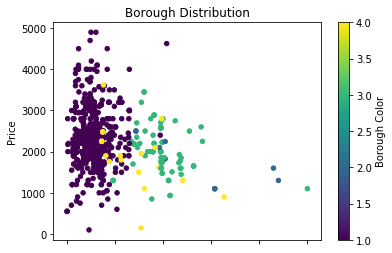

In [20]:
apt_rentals.plot.scatter(x='Downtown Proximity', y='Price', c='Borough Color', title="Borough Distribution", colormap='viridis')

In [58]:
# Save to file
apt_rentals.to_csv("apt_rentals_proximity_scaled.csv")

## Now lets bring in our venues and take a look at them

In [21]:
toronto_venues = pd.read_csv("venuesX.csv")

In [22]:
# Remove duplicate column
toronto_venues.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
# Remove Duplicate Venue Rows
toronto_venues_unique_only = toronto_venues.groupby(['Venue Latitude', 'Venue Longitude', 'Venue'])
toronto_venues_unique_only.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,43.643051,-79.391643,The Second City,43.645633,-79.391225,Comedy Club
1,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,43.641038,-79.389092,Baseball Stadium
2,Downtown Toronto,43.643051,-79.391643,Akira Back,43.645376,-79.392063,Japanese Restaurant
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,43.642561,-79.387038,Scenic Lookout
4,Downtown Toronto,43.643051,-79.391643,CN Tower,43.642536,-79.387182,Monument / Landmark
5,Downtown Toronto,43.643051,-79.391643,Bar Hop,43.645603,-79.393583,Beer Bar
6,Downtown Toronto,43.643051,-79.391643,Steam Whistle Brewing,43.641752,-79.387089,Brewery
7,Downtown Toronto,43.643051,-79.391643,TIFF Bell Lightbox,43.646342,-79.390063,Movie Theater
8,Downtown Toronto,43.643051,-79.391643,SOMA chocolatemaker,43.645328,-79.395714,Dessert Shop
9,Downtown Toronto,43.643051,-79.391643,Le Germain Hotel Toronto Mercer,43.645669,-79.391044,Hotel


## It looks like we got over 9000 unique venues for our apartments!

In [24]:
toronto_venues.drop(['Venue Latitude', 'Venue Longitude'], axis=1, inplace=True)
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Downtown Toronto,43.643051,-79.391643,The Second City,Comedy Club
1,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,Baseball Stadium
2,Downtown Toronto,43.643051,-79.391643,Akira Back,Japanese Restaurant
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,Scenic Lookout
4,Downtown Toronto,43.643051,-79.391643,CN Tower,Monument / Landmark


In [25]:
# Get number of unique values per column
toronto_venues.nunique()

Neighborhood                 4
Neighborhood Latitude      354
Neighborhood Longitude     345
Venue                     2241
Venue Category             296
dtype: int64

In [26]:
toronto_venues[toronto_venues['Venue Category'] == 'Gym']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
12,Downtown Toronto,43.643051,-79.391643,Totum Life Science King,Gym
30,Downtown Toronto,43.643051,-79.391643,Superclub,Gym
82,Downtown Toronto,43.643051,-79.391643,Fuel Training Club,Gym
102,Downtown Toronto,43.640918,-79.393982,Superclub,Gym
110,Downtown Toronto,43.640918,-79.393982,Totum Life Science King,Gym
131,Downtown Toronto,43.640918,-79.393982,Crossfit 416,Gym
181,Downtown Toronto,43.640918,-79.393982,Fuel Training Club,Gym
236,Downtown Toronto,43.641308,-79.400093,Totum Life Science King,Gym
244,Downtown Toronto,43.641308,-79.400093,GoodLife Fitness,Gym
252,Downtown Toronto,43.641308,-79.400093,Fuel Training Club,Gym


In [27]:
toronto_venues_by_neighborhood = toronto_venues.groupby(['Neighborhood Latitude', 'Neighborhood Longitude'])
toronto_venues_by_neighborhood.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Downtown Toronto,43.643051,-79.391643,The Second City,Comedy Club
1,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,Baseball Stadium
2,Downtown Toronto,43.643051,-79.391643,Akira Back,Japanese Restaurant
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,Scenic Lookout
4,Downtown Toronto,43.643051,-79.391643,CN Tower,Monument / Landmark
100,Downtown Toronto,43.640918,-79.393982,Le Sélect Bistro,French Restaurant
101,Downtown Toronto,43.640918,-79.393982,WestJet Flight Deck,Baseball Stadium
102,Downtown Toronto,43.640918,-79.393982,Superclub,Gym
103,Downtown Toronto,43.640918,-79.393982,Starbucks,Coffee Shop
104,Downtown Toronto,43.640918,-79.393982,Toronto Music Garden,Garden


## One-Hot Encoding the Venue Categories

In [31]:
unique_venue_types = toronto_venues['Venue Category'].unique()
venue_type = toronto_venues['Venue Category']

In [41]:
unique_venue_types.size

296

In [33]:
venue_type.head()

0            Comedy Club
1       Baseball Stadium
2    Japanese Restaurant
3         Scenic Lookout
4    Monument / Landmark
Name: Venue Category, dtype: object

In [72]:
one_hot_venues = pd.get_dummies(data=venue_type, prefix='Venue')
one_hot_venues.columns = one_hot_venues.columns.str.replace(" ", "_")

In [77]:
one_hot_venues.head()

,Venue_Accessories_Store,Venue_Adult_Boutique,Venue_Afghan_Restaurant,Venue_African_Restaurant,Venue_Airport,Venue_Airport_Food_Court,Venue_Airport_Lounge,Venue_Airport_Service,Venue_Airport_Terminal,Venue_American_Restaurant,...,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio,key
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [74]:
one_hot_venues.to_csv('one_hot_venues.csv')

## Merge with our Apartment Data & Group all the venues by apartment

In [78]:
# Make a common column to merge on
one_hot_venues['key'] = one_hot_venues.index
toronto_venues['key'] = toronto_venues.index

In [79]:
toronto_merge = toronto_venues.merge(one_hot_venues, on='key', how='outer')

In [80]:
# Remove common column now that merge is complete
toronto_merge.drop(['key'], axis=1, inplace=True)
toronto_merge.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue_Accessories_Store,Venue_Adult_Boutique,Venue_Afghan_Restaurant,Venue_African_Restaurant,Venue_Airport,...,Venue_Vegetarian_/_Vegan_Restaurant,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio
0,Downtown Toronto,43.643051,-79.391643,The Second City,Comedy Club,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,Baseball Stadium,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Downtown Toronto,43.643051,-79.391643,Akira Back,Japanese Restaurant,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,Scenic Lookout,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Downtown Toronto,43.643051,-79.391643,CN Tower,Monument / Landmark,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
toronto_merge.to_csv('venues_merge.csv', index=False)

### Group our Venues by Apartment

In [93]:
toronto_merge = pd.read_csv("venues_merge.csv")

In [94]:
toronto_merge.drop(['Venue', 'Venue Category', 'Neighborhood'], axis=1, inplace=True)

In [108]:
toronto_final = toronto_merge.groupby(['Neighborhood Latitude', 'Neighborhood Longitude']).sum()
toronto_final.head()

,,Venue_Accessories_Store,Venue_Adult_Boutique,Venue_Afghan_Restaurant,Venue_African_Restaurant,Venue_Airport,Venue_Airport_Food_Court,Venue_Airport_Lounge,Venue_Airport_Service,Venue_Airport_Terminal,Venue_American_Restaurant,...,Venue_Vegetarian_/_Vegan_Restaurant,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio
Neighborhood Latitude,Neighborhood Longitude,,,,,,,,,,,,,,,,,,,,,
43.628947,-79.394420,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43.634354,-79.435270,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43.634476,-79.401589,0,0,0,0,1,1,2,2,2,0,...,0,0,0,0,0,0,0,0,0,1
43.634890,-79.434654,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43.635104,-79.401013,0,0,0,0,1,1,2,2,2,0,...,0,0,0,0,0,0,1,0,0,1


In [113]:
toronto_final.to_csv('venues_merge2.csv', index=False)

## Merge with our Apartment Stats

In [123]:
apt_rentals = pd.read_csv("apt_rentals_proximity_scaled.csv")
apt_rentals.drop(['Unnamed: 0', 'Borough', 'Postal Code'], axis=1, inplace=True)
toronto_final.index.names = ['Lat', 'Long']

In [130]:
toronto_final.head()

,,Venue_Accessories_Store,Venue_Adult_Boutique,Venue_Afghan_Restaurant,Venue_African_Restaurant,Venue_Airport,Venue_Airport_Food_Court,Venue_Airport_Lounge,Venue_Airport_Service,Venue_Airport_Terminal,Venue_American_Restaurant,...,Venue_Vegetarian_/_Vegan_Restaurant,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio
Lat,Long,,,,,,,,,,,,,,,,,,,,,
43.628947,-79.394420,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43.634354,-79.435270,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43.634476,-79.401589,0,0,0,0,1,1,2,2,2,0,...,0,0,0,0,0,0,0,0,0,1
43.634890,-79.434654,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43.635104,-79.401013,0,0,0,0,1,1,2,2,2,0,...,0,0,0,0,0,0,1,0,0,1


In [129]:
apt_rentals.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Downtown Proximity,Borough Color
0,1,1.0,1,43.643051,-79.391643,2150.0,0.106921,1
1,1,1.0,0,43.640918,-79.393982,1900.0,0.134128,1
2,1,1.0,0,43.641308,-79.400093,1900.0,0.169330,1
3,1,1.0,1,43.640068,-79.399960,2400.0,0.175443,1
4,1,1.0,0,43.647627,-79.390408,2650.0,0.068714,1


In [131]:
merge2 = pd.merge(apt_rentals, toronto_final, left_on=['Lat', 'Long'], right_index=True, how='left')

In [132]:
merge2

,Bedroom,Bathroom,Den,Lat,Long,Price,Downtown Proximity,Borough Color,Venue_Accessories_Store,Venue_Adult_Boutique,...,Venue_Vegetarian_/_Vegan_Restaurant,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio
0,1,1.0,1,43.643051,-79.391643,2150.0,0.106921,1,0,0,...,5,0,0,0,0,5,0,0,0,10
1,1,1.0,0,43.640918,-79.393982,1900.0,0.134128,1,0,0,...,2,0,0,0,0,2,0,0,0,6
2,1,1.0,0,43.641308,-79.400093,1900.0,0.169330,1,0,0,...,2,0,0,0,0,0,0,0,0,6
3,1,1.0,1,43.640068,-79.399960,2400.0,0.175443,1,0,0,...,7,0,0,0,0,0,0,0,0,28
4,1,1.0,0,43.647627,-79.390408,2650.0,0.068714,1,0,0,...,15,5,0,0,0,0,0,0,0,10
5,2,2.0,0,43.639406,-79.393232,3150.0,0.141431,1,0,0,...,0,0,0,0,0,9,0,0,0,18
6,1,1.0,0,43.648005,-79.396834,2500.0,0.113508,1,0,0,...,2,1,0,0,0,0,0,0,0,3
7,1,1.0,0,43.648973,-79.387295,2299.0,0.042429,1,0,0,...,12,0,0,0,0,0,0,0,0,12
8,2,2.0,0,43.647870,-79.391138,2350.0,0.071893,1,0,0,...,20,10,0,0,0,0,0,0,0,10
9,1,1.0,1,43.639406,-79.393232,2424.0,0.141431,1,0,0,...,0,0,0,0,0,9,0,0,0,18


## Double Check we got venues for all...
### Take the Venue columns and sum across. As long as none of the sums are zero we have venues for each apartment

In [145]:
check = merge2.filter(like='Venue', axis=1).sum(axis=1)

for sum in check:
    if sum is 0:
        print("Missing some venues!")

In [146]:
# Save
merge2.to_csv('apartments_final.csv', index=False)